# Análise e Transformação de Dados @ DEI-FCTUC
## Uma resolução de exercícios de introdução à Ficha Prática nº 3 - Parte A usando MATLAB
### Autoria: Alberto Cardoso ©DEI2021/2022

Objetivo: Pretende-se iniciar a análise de séries temporais, efetuando o seu pré-processamento e a sua decomposição em componentes que traduzem os movimentos estruturais e erráticos.
A título de exemplo, são considerados os dados correspondentes à evolução inicial (dados à data de 17/03/2020) do COVID-19 em Portugal, em Itália e em Espanha.


**Exercício**
	
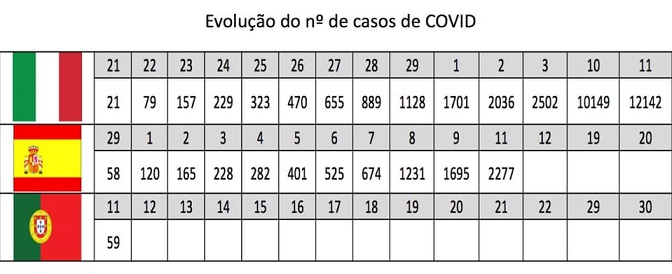
Os dados recentes do COVID-19 em Itália, Espanha e Portugal são:

• Há 19 dias a Itália tinha 21 casos, há 9 dias tinha 2036 e hoje tem 12142

• Há 11 dias a Espanha tinha 58 casos e hoje tem 2277

• Há 19 dias a Itália tinha 1 morte, há 9 dias tinha 52 e hoje tem 827.

• Há 11 dias a Espanha tinha zero mortes e hoje tem 55.

• Nós hoje temos um número semelhante ao que a Espanha tinha há dez dias e a Itália há 19 dias.

• Qual o estado no final do mês de Março de 2020, em Portugal?

**Exercício 1.1** Definir as séries temporais e representar graficamente as séries temporais.

In [1]:
%--- Dados
n_IT11=0:19;
x_IT11=[21 79 157 229 323 470 655 889 1128 1701 2036 2502 NaN NaN NaN NaN NaN NaN 10149 12142];
n_SP11=8:19;
x_SP11=[58 120 165 228 282 401 525 674 1231 1695 NaN 2277];
n_PT11=19;
x_PT11=59;
n_PT26=20:34;
x_PT26=[78 112 169 245 331 448 642 785 1020 1280 1600 4060 2362 2955 3544];

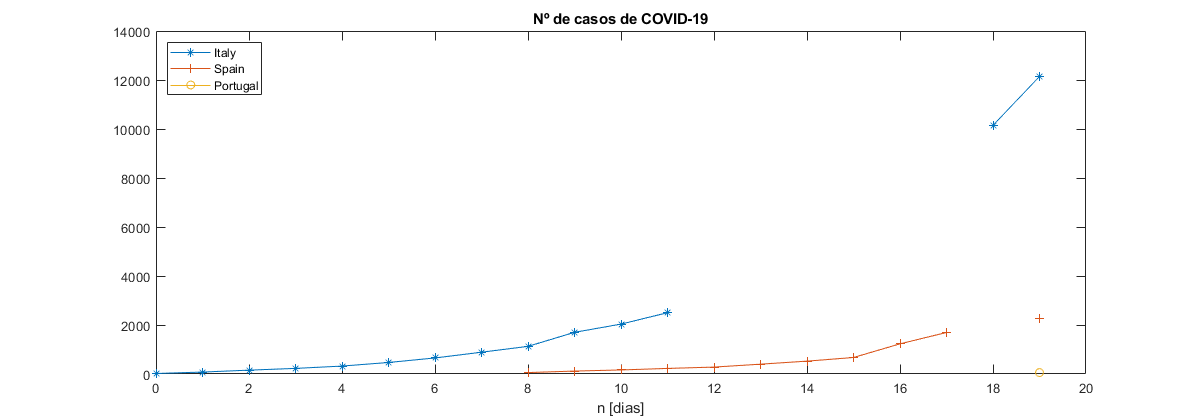

In [2]:
%plot inline -w 1200
%--- Representação gráfica das evoluções do nº de casos de COVID-19

figure(1)
plot(n_IT11,x_IT11,'-*',n_SP11,x_SP11,'-+',n_PT11,x_PT11,'-o')
xlabel('n [dias]')
title('Nº de casos de COVID-19')
legend('Italy','Spain','Portugal','Location','northwest')

<strong>Exercício 1.2</strong> Verificar a existência de valores não recolhidos/medidos, identificados com NaN (*Not a Number*). Identifique-os, e substitua cada um desses valores por valores que resultam de um processo de extrapolação e represente graficamente as séries temporais modificadas, comparando-as com as iniciais.
Sugestão: Reconstruir os valores em falta usando uma extrapolação de 3ª ordem, como o método ‘pchip’ .

Há NaN?

haNaN_IT =

  logical

   1


indNaN_IT =

    13    14    15    16    17    18


ans =

   NaN   NaN   NaN   NaN   NaN   NaN


ans =

   1.0e+03 *

    3.0776    3.7512    4.5152    5.3638    6.2927    7.2982




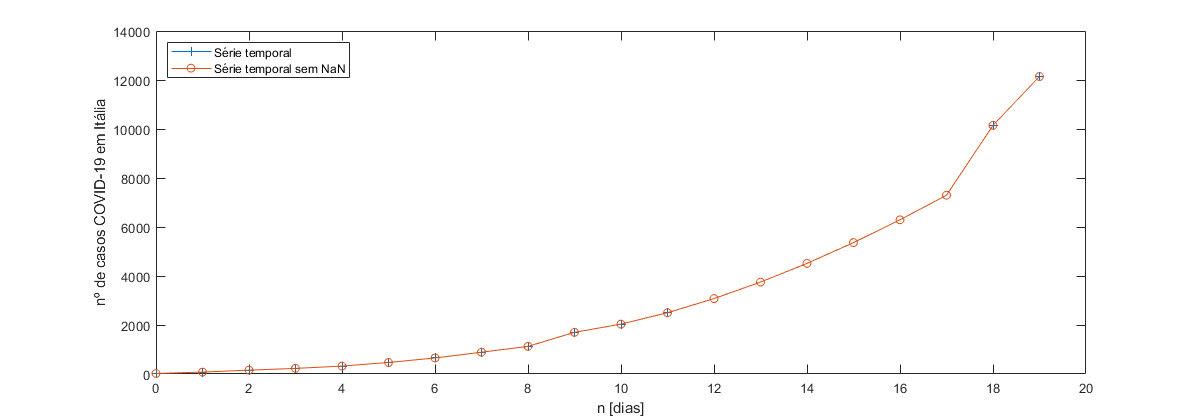

In [3]:
% Ex 1.2 - Italy
%---Verifica a existência de NaN
disp('Há NaN?')
haNaN_IT=any(isnan(x_IT11)) % Há NaN por colunas?
indNaN_IT=find(isnan(x_IT11)) % Elementos com NaN
x_IT11(indNaN_IT)

%---Elimina linhas com NaN e reconstrói
% Sugestão:
% - Reconstruir as linhas eliminadas usando extrapolação (interp1)
x_IT11r=x_IT11;
if haNaN_IT
    ind = indNaN_IT;
    for k=1:length(ind)
        nn=n_IT11(ind(k)-4:ind(k)-1); % admitindo que não há NaNs no início
        xx=x_IT11r(ind(k)-4:ind(k)-1);
        x_IT11r(ind(k))=interp1(nn,xx,n_IT11(ind(k)),'pchip','extrap');
    end
end
x_IT11r(indNaN_IT)

figure(2)
plot(n_IT11,x_IT11,'-+',n_IT11,x_IT11r,'-o');
legend('Série temporal','Série temporal sem NaN','Location','northwest')
ylabel('nº de casos COVID-19 em Itália')
xlabel('n [dias]');

Há NaN?

haNaN_SP =

  logical

   1


indNaN_SP =

    11


ans =

   NaN


ans =

   2.0575e+03




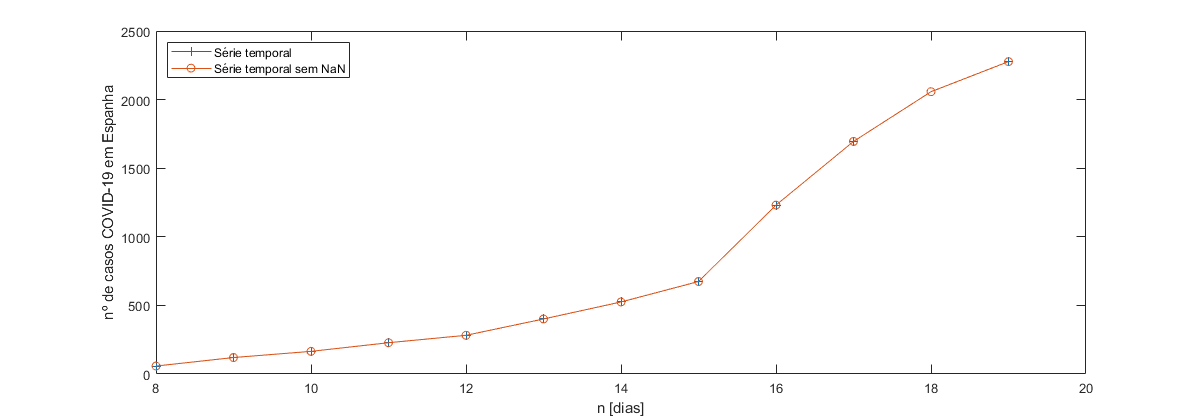

In [4]:
% Ex 1.2 - Spain
%---Verifica a existência de NaN
disp('Há NaN?')
haNaN_SP=any(isnan(x_SP11)) % Há NaN por colunas?
indNaN_SP=find(isnan(x_SP11)) % Elementos com NaN
x_SP11(indNaN_SP)

%---Elimina linhas com NaN e reconstrói
% Sugestão:
% - Reconstruir as linhas eliminadas usando extrapolação (interp1)
x_SP11r=x_SP11;
if haNaN_SP
    ind = indNaN_SP;
    for k=1:length(ind)
        nn=n_SP11(ind(k)-4:ind(k)-1); % admitindo que não há NaNs no início
        xx=x_SP11r(ind(k)-4:ind(k)-1);
        x_SP11r(ind(k))=interp1(nn,xx,n_SP11(ind(k)),'pchip','extrap');
    end
end
x_SP11r(indNaN_SP)

figure(2)
plot(n_SP11,x_SP11,'-+',n_SP11,x_SP11r,'-o');
legend('Série temporal','Série temporal sem NaN','Location','northwest')
ylabel('nº de casos COVID-19 em Espanha')
xlabel('n [dias]');

**Exercício 1.3** Determinar os valores da média (**mean**) e do desvio padrão (**std**) das séries temporais.

In [5]:
% Ex 1.3
%---Média, desvio padrão e correlação
% - Funções: mean, std e corrcoef
mu_IT11r = mean(x_IT11r)
sigma_IT11r = std(x_IT11r)

mu_SP11r = mean(x_SP11r)
sigma_SP11r = std(x_SP11r)

%---Verificar a correlação entre a evolução em Itália e em Espanha
disp('Correlação entre a evolução em Itália e em Espanha sem NaN:')
corr_IT_SP=corr(x_IT11r(end-11:end)',x_SP11r')


mu_IT11r =

   3.1390e+03


sigma_IT11r =

   3.5178e+03


mu_SP11r =

  809.4607


sigma_SP11r =

  798.3516

Correlação entre a evolução em Itália e em Espanha sem NaN:

corr_IT_SP =

    0.9783




In [6]:
%---Verificar a correlação entre a evolução em Itália e em Espanha
corr_IT_SP=corr(x_IT11r(end-11:end)',x_SP11r')
% Tendência polinomial de grau 2
p=polyfit(n_IT11,x_IT11r,2)
% Tendência exponencial 
f = fit(n_IT11',x_IT11r','exp1')


corr_IT_SP =

    0.9783


p =

   45.8533 -332.5939  635.7386


f = 

     General model Exp1:
     f(x) = a*exp(b*x)
     Coefficients (with 95% confidence bounds):
       a =       237.7  (192.5, 283)
       b =      0.2068  (0.1957, 0.2178)



**Exercício 1.4** Remover a componente da tendência para a série temporal x_PT26 de Portugal, considerando uma aproximação polinomial de grau 2, usando a função **detrend**. Obter a tendência. Representar graficamente a série temporal inicial, a tendência e a série temporal sem a tendência.

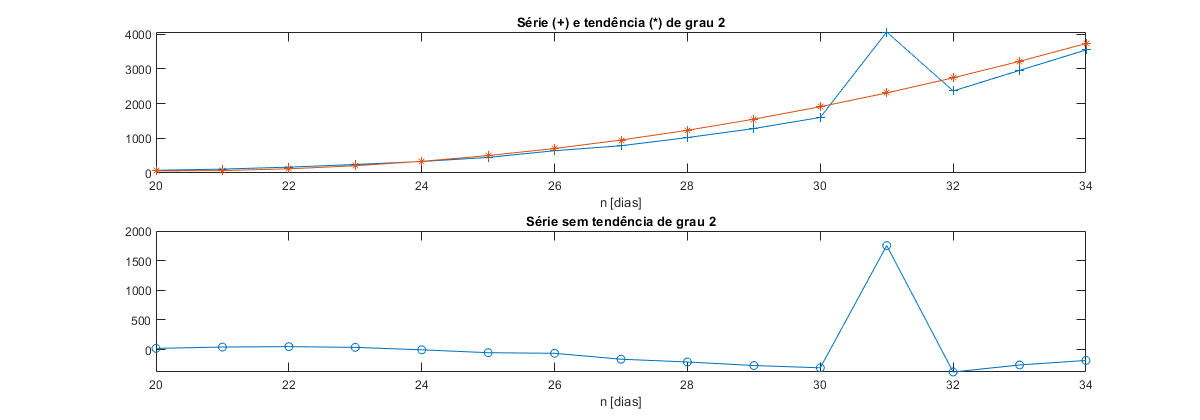

In [7]:
% Ex. 1.4
%---Estimar tendência paramétrica (polinomial)
% trend de ordem 2
x_PT26_tend=detrend(x_PT26,2);
tend_x_PT26=x_PT26-x_PT26_tend;

figure(4)
subplot(211)
plot(n_PT26,x_PT26,'-+',n_PT26,tend_x_PT26,'-*');
title('Série (+) e tendência (*) de grau 2')
xlabel('n [dias]');
subplot(212)
plot(n_PT26,x_PT26_tend,'-o');
title('Série sem tendência de grau 2')
xlabel('n [dias]');

**Exercício 1.5** Verificar a existência de *outliers* na série temporal x_PT26 de Portugal sem tendência. Identifique-os, substitua-os por valores adequados e represente graficamente a série temporal modificada, comparando-a com a inicial.


mu_PT26_tend =

  -5.6843e-13


sigma_PT26_tend =

  505.3500


indoutl =

    12


noutl =

     1


ans =

   1.7542e+03




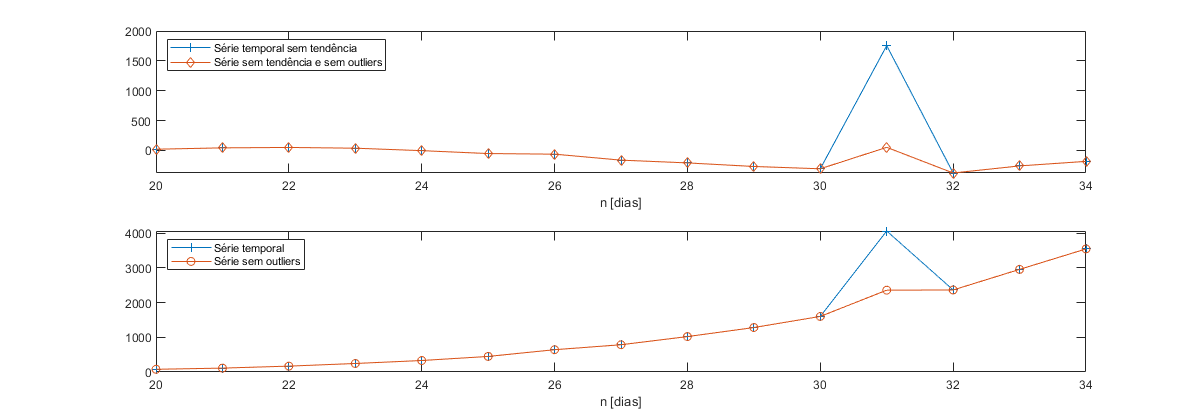

In [8]:
% Ex 1.5
%---Verifica outliers

mu_PT26_tend = mean(x_PT26_tend) % média
sigma_PT26_tend = std(x_PT26_tend) % desvio padrão

indoutl = find(abs(x_PT26_tend - mu_PT26_tend) > 3*sigma_PT26_tend) % Identifica outliers
noutl = length(indoutl) % número de outliers
x_PT26_tend(indoutl)

x_PT26_tend_o=x_PT26_tend; % Substituição dos outliers
if noutl
    for k=1:numel(indoutl)
        if x_PT26_tend(indoutl(k)) > mu_PT26_tend
            x_PT26_tend_o(indoutl(k)) = mu_PT26_tend + 0.1*sigma_PT26_tend;
        else
            x_PT26_tend_o(indoutl(k)) = mu_PT26_tend - 0.1*sigma_PT26_tend;
        end
    end
end

x_PT26_o=x_PT26_tend_o + tend_x_PT26; % série original sem outliers

figure(5) % representação gráfica dos resultados
subplot(211)
plot(n_PT26,x_PT26_tend,'-+',n_PT26,x_PT26_tend_o,'-d');
legend('Série temporal sem tendência','Série sem tendência e sem outliers','Location','northwest')
xlabel('n [dias]');

subplot(212)
plot(n_PT26,x_PT26,'-+',n_PT26,x_PT26_o,'-o');
legend('Série temporal','Série sem outliers','Location','northwest')
xlabel('n [dias]');

**Exercício 1.6** Determinar a correlação (**corrcoef**) entre a evolução em Itália e em Espanha. Estimar a evolução da série temporal em Portugal usando uma aproximação polinomial de grau 3, usando as funções **polyfit** e **polyval**. Representar graficamente a série temporal.


corr_IT_SP =

    0.9783


p =

    2.8729  -36.0250  273.8800 -199.4200




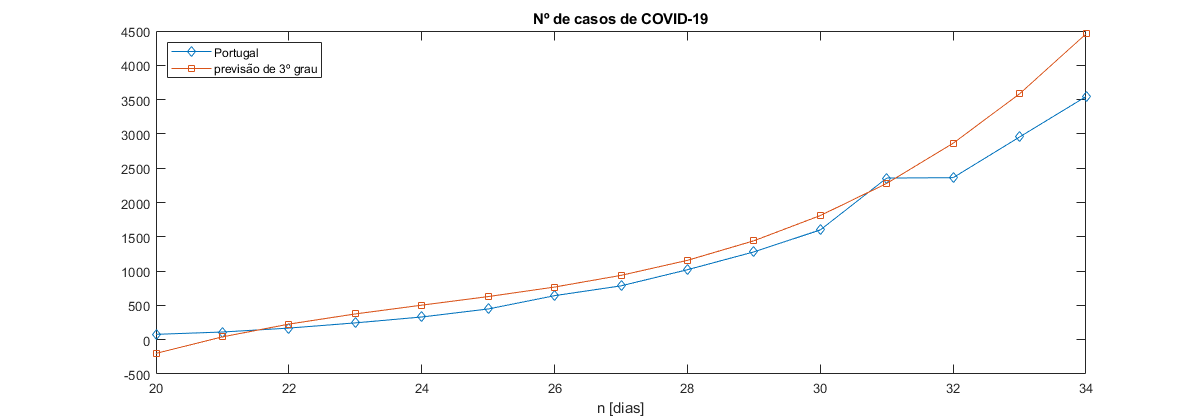

In [9]:
%---Verificar a correlação entre a evolução em Itália e em Espanha
corr_IT_SP=corr(x_IT11r(end-11:end)',x_SP11r')

% Tendência polinomial de grau 3
p=polyfit(n_IT11,x_IT11r,3)

%---Previsão da evolução do COVID-19 em Portugal
n_PT30=[20:34];
x_PT30p=polyval(p,n_PT30-20); % polinimial de 3º grau

figure(6)
plot(n_PT26,x_PT26_o,'-d',n_PT30,x_PT30p,'-s')
xlabel('n [dias]')
title('Nº de casos de COVID-19')
legend('Portugal','previsão de 3º grau','Location','northwest')